In [2]:
#importing necessary library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# X and y array
X=df.drop(columns='math score',axis=1)
y=df['math score']

In [6]:
num_feature=X.select_dtypes(exclude='object').columns
categorical_feature=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
Oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("catg",Oh_transformer,categorical_feature),
        ("num",numeric_transformer,num_feature)
    ]
)

In [7]:
X=preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [10]:
# defining a evaluate metrics
from sklearn.metrics import root_mean_squared_error,r2_score,mean_squared_error,mean_absolute_error
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=root_mean_squared_error(true,predicted)
    r2=r2_score(true,predicted)
    return mse,mae,rmse,r2


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

models={
    "linear Regression":LinearRegression(),
    "lasso":Lasso(),
    "ridge":Ridge(),
    "k-nearest":KNeighborsRegressor(),
    "decision_tree":DecisionTreeRegressor(),
    "rf":RandomForestRegressor(),
    "adaboost":AdaBoostRegressor(),
    "Support Vector Regressor":SVR(),
    "catboost":CatBoostRegressor(verbose=False)
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mse,model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training set")
    print('- Root mean squared error : {:.4f}'.format(model_train_rmse))
    print('- Mean absolute error: {:.4f}'.format(model_train_mae))
    print('- R2 squared : {:.4f}'.format(model_train_r2))

    print('*'*35)

    print("Model performance of testing set")
    print('- Root mean squared error : {:.4f}'.format(model_test_rmse))
    print('- Mean absolute error: {:.4f}'.format(model_test_mae))
    print('- R2 squared : {:.4f}'.format(model_test_r2))

    r2_list.append(model_test_r2)
    print("="*35)
    print('\n')
    

linear Regression
Model performance for training set
- Root mean squared error : 5.3243
- Mean absolute error: 4.2671
- R2 squared : 0.8743
***********************************
Model performance of testing set
- Root mean squared error : 5.3960
- Mean absolute error: 4.2158
- R2 squared : 0.8803


lasso
Model performance for training set
- Root mean squared error : 6.5938
- Mean absolute error: 5.2063
- R2 squared : 0.8071
***********************************
Model performance of testing set
- Root mean squared error : 6.5197
- Mean absolute error: 5.1579
- R2 squared : 0.8253


ridge
Model performance for training set
- Root mean squared error : 5.3233
- Mean absolute error: 4.2650
- R2 squared : 0.8743
***********************************
Model performance of testing set
- Root mean squared error : 5.3904
- Mean absolute error: 4.2111
- R2 squared : 0.8806


k-nearest
Model performance for training set
- Root mean squared error : 5.7077
- Mean absolute error: 4.5167
- R2 squared : 0.855

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','r2_score']).sort_values(by='r2_score',ascending=False)

,Model name,r2_score
2,ridge,0.880593
0,linear Regression,0.880345
5,rf,0.854229
8,catboost,0.851632
6,adaboost,0.845323
1,lasso,0.825320
3,k-nearest,0.783813
4,decision_tree,0.766909
7,Support Vector Regressor,0.728600


In [13]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is: ",score)

Accuracy of the model is:  88.03449074540941


Text(0, 0.5, 'predicted')

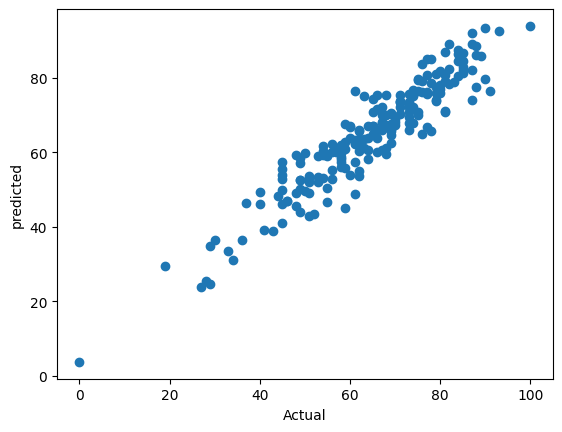

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

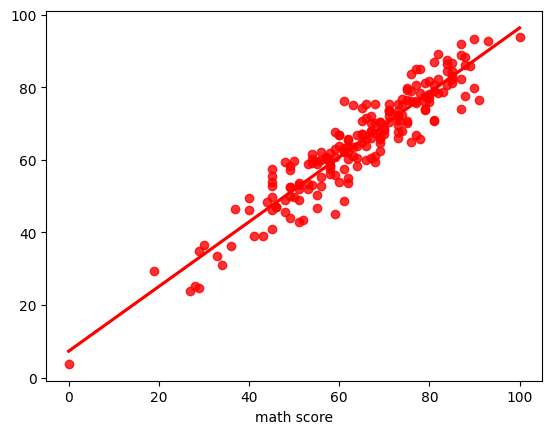

In [15]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [16]:
pred_df=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})

In [17]:
pred_df

,Actual value,Predicted value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
